# COMP4187: Parallel Scientific Computing II

## Anne Reinarz
## anne.k.reinarz@durham.ac.uk

# Organisation

# Reminder: Reading

- LeVeque, Finite Difference Methods for Ordinary and Partial Differential Equations, SIAM (2007).

- Some of this material is taken from [Jed Brown's](https://jedbrown.org) numerical computation course https://github.com/cucs-numcomp/numcomp-class/, licensed under BSD 2-clause.


- A readable textbook that covers this material (with more rigour than in this course, but still easy to follow) is Arieh Iserles' [*A first course in the numerical analysis of differential equations*](http://www.damtp.cam.ac.uk/user/ai/Arieh_Iserles/Textbook.html). Our treatment will be somewhat more computational.

# Organisation

- We are moving on to the next notebook: finite-differences.ipynb

- The previous notebook also contains a few things on higher-order methods, such as Runge-Kutta schemes which should be a repetition from PSCI

# Recap: Method of Lines

When we eventually encounter spatial derivatives, along with time derivatives, we will first discretise in space, obtaining a system of ODEs and then in time. This is known as the _method of lines_. 

$$
 \dot u = f(t, u), t \ge t_0, u(t_0) = u_0
$$

- where $f : [t_0, \infty) \times \mathbb{R}^d \to \mathbb{R}^d$, $u \in \mathbb{R}^d$ 
- we require that $f$ is Lipshitz
- When discretising in time and space simply insert your spatial discretisation for $f(t,u)$ and proceed as usual with the time-stepping scheme

# Spatial Discretisation

Most problems one encounters in the real world have spatial as well as time derivatives. Our first example is the [*Poisson equation*](https://en.wikipedia.org/wiki/Poisson%27s_equation):

$$
\begin{align}
-\frac{\text{d}^2 u}{\text{d} x^2} &= g(x) \quad x \in \Omega = (-1, 1)\\
 u(-1) &= a\\
 \frac{\text{d} u}{\text{d} x}(1) &= b\\
 \end{align}.
$$

- This is termed a *boundary value problem* (BVP), since we  specify  a condition on the boundary of the domain.

## Finite difference framework

- The solution $u(x)$ is represented by _pointwise_ values $u_i = u(x_i)$ at some discrete set of points $-1 = x_0 < x_1 < \dots < x_N = 1$. Importantly, the framework _does not_ specify the value of $u$ outside of these points;
- derivatives of $u$ at points $x_i$ are approximated using differencing formulae that utilise a finite number of neighbouring points (independent of $N$);
- boundary conditions are either enforced pointwise (e.g. the $u(-1)$ case above), or (when constraining derivatives) with one-sided differencing formulae;
- $f$ is evaluated pointwise at each $x_i$;
- we require that our finite difference method satisfies the equation pointwise at each $x_i$ in the interior of the domain.

### Differencing formulae

This is a _one-sided_ approximation: we only use $u_i$ and $u_{i+1}$. Another one-sided approximation would be to offset in the other direction


$$
D_{-} u_i := \frac{u_i - u_{i-1}}{h}.
$$

Finally, we can also use a _centred_ approximation by averaging the two one-sided approximations:

$$
D_0 u_i := \frac{u_{i+1} - u_{i-1}}{2h} = \frac{1}{2} (D_+ + D_-) u_i.
$$

## Higher-order derivatives

We can compute high-order derivatives by repeatedly applying differencing operators for lower-order derivatives.

For example, the second derivative

$$
\frac{\text{d}^2 u}{\text{d} x^2} \approx D^2 u_i = D_+ D_- u_i = \frac{1}{h^2}\left(u_{i+1} - 2 u_i + u_{i-1}\right) = D_- D_+ u_i.
$$

## Boundary conditions

The final missing piece required before we can solve the our first PDE is to figure out how we will treat boundary conditions. To do this, we will first recast the differencing operators as matrices. it is then somewhat easier to see what is going on.



## Boundary conditions
We can think of the differencing operator acting on an entire vector

$$
U = \begin{bmatrix}
u_0\\
u_1\\
\vdots\\
u_N
\end{bmatrix}
$$

at once. 

- Here, $u_0$ is the solution at nodal point $x_0$, ...

## Applying the operator
For example, we can write

$$
D_+ = \frac{1}{h} \begin{bmatrix}
-1 & 1 & 0 & \dots & 0\\
0 & -1 & 1 & \dots & 0\\
\vdots & \ddots & \ddots & \vdots & \vdots\\
0 & \dots & 0 & -1 & 1\\
0 & \dots & 0 & 0 & -1\\
\end{bmatrix}
$$

## Applying the operator

or
$$
D^2 = \frac{1}{h^2} \begin{bmatrix}
-2 & 1 & 0 &  \dots & 0\\
1 & -2 & 1 &  \dots & 0\\
\vdots & \ddots & \ddots & \vdots & \vdots\\
0 & \dots & \dots 1 & -2 & 1\\
0 & \dots & 0 & 1 & -2\\
\end{bmatrix}.
$$

## Applying the operator
In matrix form, our problem becomes

$$
\underbrace{D^2}_{A} \underbrace{\begin{bmatrix}
u_0\\
u_1\\
\vdots\\
u_N
\end{bmatrix}}_{U} = \underbrace{\begin{bmatrix} f_0\\f_1\\\vdots\\f_N\end{bmatrix}}_{F}.
$$

## Boundary Conditions
Recall, our problem was to find $u \in (-1, 1)$ satisfying

$$
\begin{align}
\frac{\text{d}^2 u}{\text{d} x^2} u &= f\\
u(-1) &= a\\
\frac{\text{d} u}{\text{d} x}(1) &= b
\end{align}
$$

### Dirichlet conditions

These conditions, of the form 

$$
u(-1) = a
$$

specify the _value_ of the solution at a particular point (or set of points). This means, that rather than solving a small equation to determine the value at this point, we _already know_ and can instead replace the relevant rows of the matrix.


### Dirichlet conditions

Let us suppose we have ordered our points such that $u(-1)$ corresponds to $u_0$. Then we have

$$
\begin{bmatrix}
1 & 0 & \dots & 0\\
 & & & \\
 & & A_{1:,:} & \\
 & & &\\
\end{bmatrix}
U = \begin{bmatrix} a\\ \\ F_{1:} \\ \\ \end{bmatrix}.
$$


### Dirichlet conditions

- In general, if we have a boundary value $\alpha_i$ that constrains $u_i$ then we replace the $i$th row with the identity, and the $i$th value in the right hand side with $\alpha_i$.

- This modification destroys any symmetry that might have existed in the matrix $A$, since we have zeroed rows, but not the corresponding columns.


### Dirichlet conditions

If we write the linear system in block form, we can, however, see a way around this:

$$
\begin{bmatrix}
I & 0\\
A_{10} & A_{11}
\end{bmatrix}
\begin{bmatrix}
U_0\\
U_1
\end{bmatrix}
=
\begin{bmatrix}
F_0\\
F_1
\end{bmatrix}
$$

Since we know $U_0$ (they are just $F_0$), we can forward-substitute and move the lower-left block of the matrix onto the right hand side, to produce

$$
\begin{bmatrix}
I & 0\\
0 & A_{11}
\end{bmatrix}
\begin{bmatrix}
U_0\\
U_1
\end{bmatrix}
=
\begin{bmatrix}
F_0\\
F_1 - A_{10}F_0
\end{bmatrix}.
$$

This is often a convenient form to work with.


### Dirichlet conditions

Alternately, since the equations for $U_0$ are just the identity, we can write our solver to just handle

$$
A_{11} U_1 = F_1 - A_{10}F_0
$$

and insert the boundary values into a big vector whenever we need to visualise it.

### Dirichlet conditions

#### Special Case: Homogeneous Dirichlet conditions

In the special case $a=0$

$$
A_{11} U_1 = F_1 - A_{10}F_0 = F_1
$$

we can drop the boundary conditions completely since the entries in $F_0$ are zero.

This effectively corresponds to dropping the degrees of freedom from the system.

For visualisation we may want to add the zeros back on.

## Neumann conditions

We can now treat boundary conditions that constrain the value of the solution, but recall that the condition at $x=1$ instead constrains gradient of the solution. 

$$\frac{\text{d} u}{\text{d} x}(1) = b$$

We cannot do this by setting values, but must instead form an equation for the boundary value.

## Neumann conditions


There are typically two ways to do this. 

1. We come up with a one-sided differencing formula for the derivative directly.
2. Or we introduce a (or possibly more than one) _ghost value_ outside of the domain such that we can then just use our interior discretisation

## Neumann conditions

### Method 1: One-sided difference
Recalling the one-sided difference we might replace the boundary term

$$
\frac{\text{d} u}{\text{d} x}(1) = b
$$

by

$$
\frac{u_n - u_{n-1}}{h} = b.
$$


## Neumann conditions

### Method 1: One-sided difference

This is simple but has some potential drawbacks

1. We need to make a different choice for the discretisation on the boundary to that in the interior
2. This choice may not have the same order of accuracy
3. It may destroy symmetry that previously existed in the problem.

## Neumann conditions

### Method 2: Ghost values

An alternate option is to introduce a (or possibly more than one) _ghost value_ outside of the domain such that we can then just use our interior discretisation. We then define the value of this ghost point to be the reflection (possibly weighted by the boundary value) of the interior point.

## Neumann conditions

### Method 2: Ghost values
That is, we introduce $u_{n+1} = u(x_{n+1})$ and set

$$
u_{n+1} = u_{n-1} + 2b(\underbrace{x_n - x_{n-1}}_{h}).
$$

Now we can use our interior discretisation

$$
\frac{-u_{n-1} + 2u_n - u_{n+1}}{h^2} = f(x_n)
$$


## Neumann conditions

### Method 2: Ghost values
Substituting in the definition of $u_{n+1}$ we obtain

$$
\begin{align}
\frac{-u_{n-1} + 2u_n - (u_{n-1} + 2bh)}{h^2} &= f(x_n)\\
\frac{2(u_n - u_{n-1})}{h^2} &= f(x_n) + \frac{2b}{h}\\
\frac{u_n - u_{n-1}}{h^2} &= \frac{f(x_n)}{2} + \frac{b}{h}
\end{align}.
$$

## Neumann conditions


Let's compare these approaches.

In [2]:
def laplacian(N, rhsfunc):
    x = numpy.linspace(0, 1, N+1)
    h = 1/N
    rhs = rhsfunc(x)
    e = numpy.ones(N)
    # interior discretisation
    L = (2*numpy.eye(N+1) - numpy.diag(e, 1) - numpy.diag(e, -1)) / h**2
    return x, L, rhs, h

def apply_dirichlet(L, rhs, h, vals, indices):
    N, _ = L.shape
    diag = numpy.eye(1, N)
    bcmask = numpy.zeros(N, dtype=bool)
    bcmask[indices] = True
    # Dirichlet rows
    L[numpy.ix_(bcmask)] = numpy.vstack([numpy.roll(diag, i) for i in indices])
    rhs[numpy.ix_(bcmask)] = vals
    # Forward substitute
    rhs[numpy.ix_(~bcmask)] -= L[numpy.ix_(~bcmask, bcmask)] @ vals
    L[numpy.ix_(~bcmask, bcmask)] = 0
    return L, rhs, h

In [3]:
def apply_neumann_oneside(L, rhs, h, b, index):
    N, _ = L.shape
    assert index == N - 1
    L[index, :] = 0
    L[index, index] = 1/h
    L[index, index - 1] = -1/h
    rhs[index] = b
    return L, rhs, h

def apply_neumann_ghost(L, rhs, h, b, index):
    N, _ = L.shape
    L[index, index] /= 2
    rhs[index] = b/h + rhs[index]/2
    return L, rhs, h

## Neumann conditions

We'll solve

$$
\begin{align}
-\frac{\text{d}^2 u}{\text{d} x^2} &= e^x \text{ in } (0, 1)\\
u(0) &= e^{0}\\
\frac{\text{d} u}{\text{d} x} &= e^{1}\\
\end{align}
$$

with convenient exact solution $u(x) = e^{x}$.

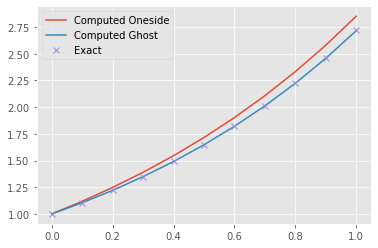

In [8]:
import numpy
import matplotlib.pyplot as pyplot
import matplotlib.lines as mlines
pyplot.style.use('ggplot')

N = 10
rhsfunc = lambda x: -numpy.exp(x)
exact = lambda x: numpy.exp(x)
x, L, rhs, h = laplacian(N, rhsfunc)
L, rhs, h = apply_dirichlet(L, rhs, h, [exact(0)], [0])
L, rhs, h = apply_neumann_oneside(L, rhs, h, exact(1), N)
uoneside = numpy.linalg.solve(L, rhs)

x, L, rhs, h = laplacian(N, rhsfunc)
L, rhs, h = apply_dirichlet(L, rhs, h, [exact(0)], [0])
L, rhs, h = apply_neumann_ghost(L, rhs, h, exact(1), N)
ughost = numpy.linalg.solve(L, rhs)

pyplot.figure()
pyplot.plot(x, uoneside, label="Computed Oneside")
pyplot.plot(x, ughost, label="Computed Ghost")
pyplot.plot(x, exact(x), linestyle="none", marker="x", label="Exact")
pyplot.legend();

## Observations

Perhaps unsurprisingly, the one-sided application of the Neumann conditions performs worse than the ghost version. Interestingly, they are effectively the *same* discretisation in the matrix, the only difference is that in the ghost version, we corrected the right hand side we're solving for by a small amount to take into account the issues in the one-sided discretisation.

The same two approaches work for higher-order derivatives in the same way

## Observations

It looks like we have a lower-order scheme. Let's check by performing an MMS test.

To do so, we have to introduce how to measure errors. Since our discrete solution $u_i$ is supposed to approximate $u(x_i)$ it is natural to consider the pointwise errors $u_i - u(x_i)$. Let us now consider how to measure the size of the error vector (or indeed any vector).

$$
E = \begin{bmatrix} u_0 - u(x_0)\\
\vdots\\
u_n - u(x_n)
\end{bmatrix}
$$


# Error norms

So far we have been using the $\infty$-norm or $\max$-norm.

$$
\|E\|_\infty := \max_{0 \le i \le n} |E_i| = \max_{0 \le i \le n} |u_i - u(x_i)|
$$

which measures the largest pointwise error over the interval.


# Error norms

Other common norms are the $1$-norm

$$
\|E\|_1 = h \sum_{i=0}^n |E_i|
$$

and the $2$-norm

$$
\|E\|_2 = \left(h \sum_{i=0}^n |E_i|^2 \right)^{1/2}.
$$

Notice the factor of $h$ appearing in these definitions. This is needed so the norm does not spuriously grow when we add more points.

In [9]:
# Here we use the 2-norm
def error(u, exact, h):
    return numpy.sqrt(h)*numpy.linalg.norm(u - exact)

# Error norms

### Aside

These are special cases of $l_p$ norms

$$
\|E\|_p = \left(h \sum_{i=0}^n |E_i|^p\right)^{1/p}.
$$

In [10]:
def mms_errors(neumann):
    errors = []
    Ns = numpy.asarray(list(2**i for i in range(4, 11)))
    rhsfunc = lambda x: -numpy.exp(x)
    exact = lambda x: numpy.exp(x)
    for N in Ns:
        x, L, rhs, h = laplacian(N, rhsfunc)
        L, rhs, h = apply_dirichlet(L, rhs, h, [exact(0)], [0])
        L, rhs, h = neumann(L, rhs, h, exact(1), N)
        u = numpy.linalg.solve(L, rhs)
        errors.append(error(u, exact(x), 1/N))
    return 1/Ns, numpy.asarray(errors)

<IPython.core.display.Javascript object>


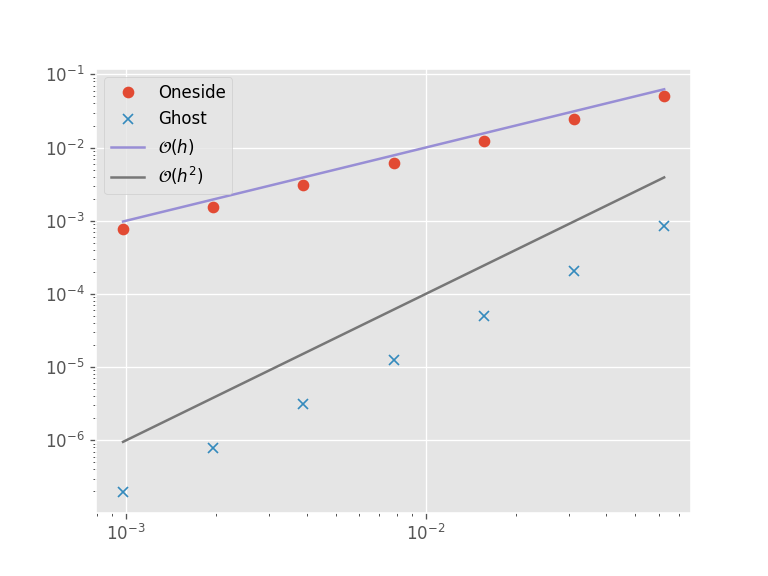

In [19]:
_, oneside = mms_errors(apply_neumann_oneside)
hs, ghost = mms_errors(apply_neumann_ghost)
pyplot.figure()
pyplot.loglog(hs, oneside, "o", label="Oneside");
pyplot.loglog(hs, ghost, "x", label="Ghost");
pyplot.loglog(hs, hs, label="$\mathcal{O}(h)$");
pyplot.loglog(hs, hs**2, label="$\mathcal{O}(h^2)$");
pyplot.legend();

# Observation

This confirms our suspicion that the one-sided differencing for the Neumann condition is only first-order accurate.


An alternative approach to obtaining a second-order scheme (rather than the ghost method above) is to try and determine a second-order accurate one-sided difference approximation to the first derivative. We will state an example first, and then see where it comes from.

A second-order accurate one-sided approximation to the first derivative is obtained with

$$
\frac{\text{d} u}{\text{d} x} \approx \frac{1}{h}\left(\frac{3}{2} u_i - 2 u_{i-1} + \frac{1}{2} u_{i-2}\right)
$$

In [11]:
def apply_neumann_oneside_second(L, rhs, h, b, index):
    N, _ = L.shape
    assert index == N - 1
    L[index, :] = 0
    L[index, index] = 3/(2*h)
    L[index, index - 1] = -2/h
    L[index, index - 2] = 1/(2*h)
    rhs[index] = b
    return L, rhs, h

<IPython.core.display.Javascript object>


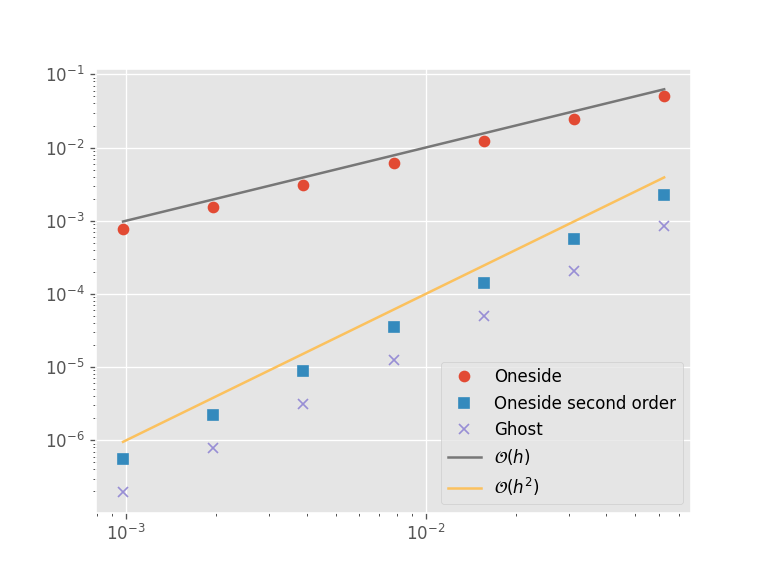

In [21]:
_, oneside = mms_errors(apply_neumann_oneside)
_, second = mms_errors(apply_neumann_oneside_second)
hs, ghost = mms_errors(apply_neumann_ghost)
pyplot.figure()
pyplot.loglog(hs, oneside, "o", label="Oneside");
pyplot.loglog(hs, second, "s", label="Oneside second order");
pyplot.loglog(hs, ghost, "x", label="Ghost");
pyplot.loglog(hs, hs, label="$\mathcal{O}(h)$");
pyplot.loglog(hs, hs**2, label="$\mathcal{O}(h^2)$");
pyplot.legend();

# Observation

This converges at second order as, perhaps, expected. The absolute error is a little worse than the ghosted version. However, this approach is sometimes more convenient, especially on irregularly spaced meshes.

## Deriving high-order finite difference stencils

Where did the approximation

$$
\frac{\text{d} u}{\text{d} x} \approx \frac{1}{h}\left(\frac{3}{2} u_i - 2 u_{i-1} + \frac{1}{2} u_{i-2}\right)
$$

come from? 

- Given some points at which we're allowed to evaluate $u$, we can derive an appropriate formula from the Taylor series using the *method of undetermined coefficients*. 
- This works in a very similar way to determining the truncation error for a given expansion.

## Deriving high-order finite difference stencils

For the example above, we want to approximation $u'(x)$ and we are given $u_i = u(x)$, $u_{i-1} = u(x - h)$, and $u_{i-2} = u(x - 2h)$. We can write our differencing operator as a *linear combination* of the provided points

$$
D_2 u(x) = a u(x) + bu(x-h) + c u(x - 2h)
$$

where our goal is to determine $a$, $b$, and $c$ to minimise the truncation error (that is, give the best possible accuracy).

## Deriving high-order finite difference stencils

Let's Taylor-expand on the right hand side

$$
D_2 u(x) = a u(x) + b \overbrace{\left(u(x) - hu'(x) + \frac{h^2}{2} u''(x) - \frac{h^3}{6} u'''(x)\right)}^{u(x - h)}\\ + c \overbrace{\left(u(x) - 2h u'(x) + \frac{4h^2}{2}u''(x) - \frac{8 h^3}{6} u'''(x)\right)}^{u(x-2h)} + \mathcal{O}(h^4)
$$


## Deriving high-order finite difference stencils

Gathering terms we have

$$
D_2 u(x) = (a + b + c)u(x) - (b + 2c) h u'(x) + \frac{1}{2}(b + 4c)h^2 u''(x) - \frac{1}{6}(b + 8c) h^3 u'''(x) + \mathcal{O}(h^4).
$$

## Deriving high-order finite difference stencils

To maximise the accuracy of agreement with $u'(x)$ we need

$$
\begin{aligned}
a + b + c &= 0 && \text{zeroing the $h^0 u(x)$ term}\\
b + 2c &= -\frac{1}{h} && \text{ensuring that we have a $u'(x)$ term}\\
b + 4c &= 0 && \text{zeroing the $h^2 u''(x)$ term}\\ 
b + 8c &= 0 && \text{zeroing the $h^3 u'''(x)$ term}.
\end{aligned}
$$


## Deriving high-order finite difference stencils

Since we have only three unknowns, we can only satisfy three equations. To maxmimise the accuracy, we'll choose to zero the $h^2$ and $h^0$ terms, and live with the $h^3$ term. We therefore need to solve the linear system

$$
\begin{bmatrix}
1 & 1 & 1\\
0 & 1 & 2\\
0 & 1 & 4
\end{bmatrix}
\begin{bmatrix}
a \\ b \\ c
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ -\frac{1}{h} \\ 0
\end{bmatrix}.
$$

In [22]:
import numpy
A = numpy.asarray([[1, 1, 1],
                   [0, 1, 2],
                   [0, 1, 4]])
b = numpy.asarray([0, -1, 0])

numpy.linalg.solve(A, b)

array([ 1.5, -2. ,  0.5])

## Deriving high-order finite difference stencils

So we have

$$
\begin{bmatrix}
a \\ b \\ c
\end{bmatrix} =
\frac{1}{2h}
\begin{bmatrix}
3\\
-4\\
1
\end{bmatrix}
$$

and hence our optimal formula is indeed

$$
D_2 u(x) = \frac{1}{2h}(3 u_i - 4 u_{i-1} + u_{i-2})
$$

## Deriving high-order finite difference stencils

We can immediately determine the accuracy of this approximation since we know the first term we did not manage to match exactly is

$$
- \frac{1}{6}(b + 8c) h^3 u'''(x)
$$

substituting in the values for $b$ and $c$ we have

$$
\begin{aligned}
D_2 u(x) - u'(x) &= -\frac{1}{6}\left(\frac{-2}{h} + \frac{8}{2h}\right) h^3 u'''(x) + \mathcal{O}(h^4)\\
                 &= -\frac{1}{3} h^2 u'''(x) + \mathcal{O}(h^4)
\end{aligned}
$$

so this approximation is second order accurate.

<IPython.core.display.Javascript object>


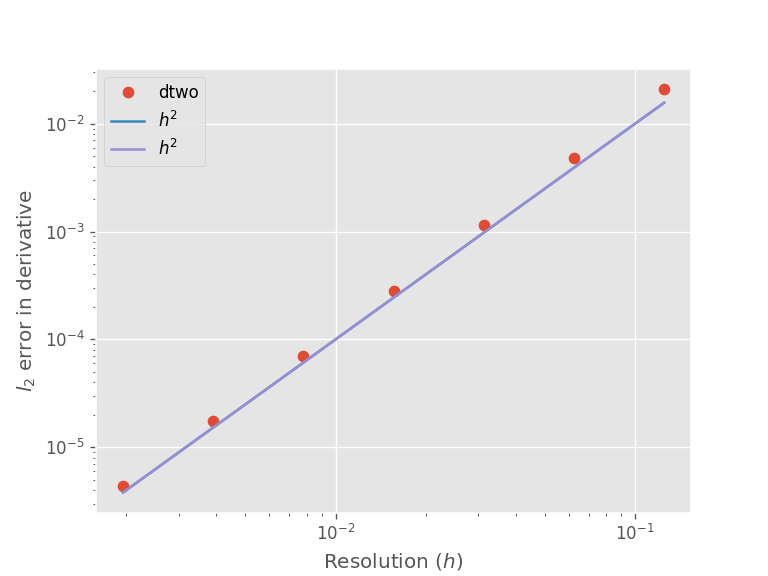

In [23]:
def dtwo(x, u):
    h = x[2:] - x[1:-1]
    du = 1/(2*h) * (3 * u[2:] - 4*u[1:-1] + u[:-2])
    return x[2:], du

grids = 2**numpy.arange(3, 10)

def error(f, df, op):
    for n in grids:
        x = numpy.linspace(-1, 1, n)
        x, y = op(x, f(x))
        yield numpy.sqrt(1/n)*numpy.linalg.norm(y - df(x), None)

pyplot.figure()
pyplot.loglog(1/grids, list(error(numpy.sin, numpy.cos, dtwo)), marker="o", linestyle="none", label=dtwo.__name__)
    
pyplot.xlabel("Resolution ($h$)")
pyplot.ylabel("$l_2$ error in derivative")

pyplot.loglog(1/grids, 1/grids**2, label="$h^2$")
pyplot.loglog(1/grids, 1/grids**2, label="$h^2$")
pyplot.legend();

## Questions

1. Use this technique to derive a third-order accurate one-sided differencing operator for $\frac{\text{d}}{\text{d} x}$ using 4 points $u(x)$, $u(x - h)$, $u(x - 2h)$, $u(x - 3h)$.

# Choosing an approximation

If we just consider a three-point region centered around a point $i$, we can write the three approximations to $\frac{\text{d}}{\text{d} x}$ we have seen as stencils:

$$
\begin{aligned}
D_+ &= \frac{1}{h}\begin{bmatrix}0 & -1 &1\end{bmatrix}\\
D_- &= \frac{1}{h}\begin{bmatrix}-1 &  1 & 0\end{bmatrix}\\
D_0 &= \frac{1}{2h}\begin{bmatrix}-1 & 0 & 1\end{bmatrix}\\
\end{aligned}.
$$

# Choosing an approximation

Recall that we noticed that the centered difference approximation sometimes gave catastrophic results (all zero derivatives) for very rough functions. The question therefore might arise how to pick between $D_+$ and $D_-$.

- both first order accurate

## Differencing for advection
 We will study this using the linear *advection equation* as a prototype.

This equation models the transport of some material by a bulk motion. This (especially when talking about fluid flow) is called convection. As usual [wikipedia has lots of information](https://en.wikipedia.org/wiki/Advection).


## Differencing for advection
Find $u(x, t)$ satisfying

$$
\partial_t u + c \cdot \nabla u = f(t, x)
$$

Where $c$ is the advecting velocity and

$$
\nabla u = \partial_x u
$$
in one dimension, and
$$
\nabla u = \begin{bmatrix} \partial_x u\\ \partial_y u\end{bmatrix}
$$
in two dimensions.

## Differencing for advection

This is a first-order PDE, for which we need to supply one boundary condition (to pin down the spatial derivative) and one initial condition (to start everything off). The boundary condition, it turns out, has to be at the *inflow* boundary.

Let's try and solve this equation with an explicit Euler time integration scheme on the interval $[0, 5]$ and look at the effect of the different differencing operators. 

## Differencing for advection

If we write this out we have (using superscripts for time points and subscripts for spatial points)

$$
u^{n+1}_i = u^n_i + \Delta t (f^n_i - c D u^n_i).
$$

We'll set the forcing function $f$ to be zero and pick boundary condition

$$
u(t, 0) = 0
$$

and initial condition

$$
u(0, x) = e^{-2(x - 2.5)^2}
$$

In [14]:
L = 30
nx = 50
x = numpy.linspace(0, L, nx + 1)
h = L/nx
u = numpy.exp(-2*(x - L/2)**2)
uhat = numpy.zeros_like(x)
uhat[nx//3:2*nx//3] = 1


def Aupwind(nx, h, c):
    A = numpy.zeros((nx+1, nx+1), dtype=float)
    for i in range(1, nx+1):
        A[i, i-1] = c/h
        A[i, i] = -c/h
    # Boundary condition (will be fixed later)
    A[0, 0] = 0
    return A

def Adownwind(nx, h, c):
    A = numpy.zeros((nx+1, nx+1), dtype=float)
    for i in range(1, nx):
        A[i, i] = c/h
        A[i, i+1] = -c/h
    # Boundary condition (will be fixed later)
    A[0, 0] = 0
    A[nx, nx] = c/h
    return A

t = 0
tfinal = 10
c = 1
dt = 2/(nx + 1)

Id = numpy.eye(nx+1)

downwind = Id + dt*Adownwind(nx, h, c)
upwind = Id + dt*Aupwind(nx, h, c)

u = uhat
hist = [(t, u)]
while t < tfinal:
    u = downwind @ u
    hist.append((t, u))
    t += dt
hist = numpy.asarray(hist)    

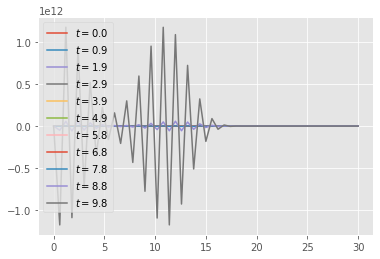

In [15]:
pyplot.figure()
for t, hist_ in hist[::len(hist)//10]:
    pyplot.plot(x, hist_, label=f"$t = {t:3.1f}$")
pyplot.legend();

## Observations

1. The "downwind" discretisation is unstable (blowing up near the boundary). The upwind version is stable, if we have a small enough time step. This makes physical sense, because the downwind discretisation is trying to obtain information "from the future".

2. The upwind discretisation is *dissipative*: the correct physical solution is just to transport the initial condition to the right, but we see that the peak spreads and flattens.

3. This also occurs with sharp fronts (e.g. transporting a hat function)